In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
#1
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
df.columns

Index(['Chirps/Second', 'Ground Temperature'], dtype='object')

In [ ]:
X = df[['Ground Temperature']]
y = df[['Chirps/Second']]
lr.fit(X,y)

LinearRegression()

In [ ]:
b1 = lr.coef_[0]

In [ ]:
b0 = lr.intercept_

In [ ]:
print('Linear Regression Equation: y = {} * x + {}'.format(b1, b0))

Linear Regression Equation: y = [0.20299973] * x + [0.45931465]


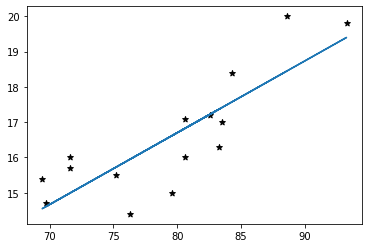

In [ ]:
#2 plot the line of regression line and original data
y_pred = lr.predict(X)
plt.scatter(X,y , c = 'k' , marker = '*')
plt.plot(X , y_pred)

In [ ]:
#3
R2_score = lr.score(X,y)
print(R2_score.round(3))

0.692


In [ ]:
#here r2_score is less than 0.85 , so this is not good fit .

In [ ]:
#4 Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
print('At 95˚F, our approximation of chirps/sec is: {:.4f}'.format(lr.predict(95)[0]))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
#5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at 
#a rate of 18 chirps per second.  
#What was the approximate ground temperature that morning? 
#x =  (y-b0)/b1  #from equation
g_temp = (18 - b0) / b1
print(g_temp[0].round(2))


86.41


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
X = df[['Brain']]
y = df[['Body']]

In [ ]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X,y)

LinearRegression()

In [ ]:
b0 = lr1.intercept_
print(type(b0))

<class 'numpy.ndarray'>


In [ ]:
b1 = lr1.coef_[0]
print(type(b1))

<class 'numpy.ndarray'>


In [ ]:
print("Equation of line y = {} + {}*x".format(b0,b1))

Equation of line y = [91.00439621] + [0.96649637]*x


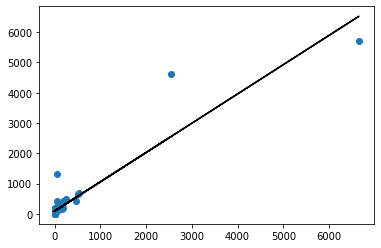

In [ ]:
y_pred = lr1.predict(X)
plt.scatter(X,y)
plt.plot(X, y_pred ,'-k')


In [ ]:
print("R2-score is " , lr1.score(X,y).round(3))

R2-score is  0.873


In [ ]:
# here r2-score is greater that 0.85 , data is good fitted by model 

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [ ]:
X.shape

(52, 5)

In [ ]:
y.shape

(52,)

In [ ]:
lr2 = linear_model.LinearRegression()

In [ ]:
lr2.fit(X , y)

LinearRegression()

In [ ]:
c_arr = np.round_(lr2.coef_ , decimals = 3)

In [ ]:
coef = np.round_(lr2.intercept_)

In [ ]:
print("Regression line equation y = {} + {}*x1 + {}*x2 + {}*x3 + {}*x4+{}*x5 ".format(coef , c_arr[0] , c_arr[1] , c_arr[2], c_arr[3] ,c_arr[4]))

Regression line equation y = 11410.0 + 1241.792*x1 + 5586.181*x2 + 482.86*x3 + -1331.644*x4+-128.791*x5 


In [ ]:
#2
print("R2- score for above equation : ",lr2.score(X,y).round(4))
import itertools as it

R2- score for above equation :  0.8547


In [ ]:
features = X.columns
f_list = list(features)

In [ ]:
score_combination_list = []
for i in range(1,len(f_list)+1):
  feature_combination = it.combinations(f_list , i)
  for each in feature_combination:
   X_list = list(each)
   X_each = df[X_list]
   lr2.fit(X_each , y)
   print(X_list , lr2.score(X_each , y).round(3))

['Sex'] 0.064
['Rank'] 0.753
['Year'] 0.491
['Degree'] 0.005
['YSdeg'] 0.455
['Sex', 'Rank'] 0.755
['Sex', 'Year'] 0.491
['Sex', 'Degree'] 0.066
['Sex', 'YSdeg'] 0.493
['Rank', 'Year'] 0.844
['Rank', 'Degree'] 0.756
['Rank', 'YSdeg'] 0.762
['Year', 'Degree'] 0.492
['Year', 'YSdeg'] 0.578
['Degree', 'YSdeg'] 0.541
['Sex', 'Rank', 'Year'] 0.845
['Sex', 'Rank', 'Degree'] 0.758
['Sex', 'Rank', 'YSdeg'] 0.767
['Sex', 'Year', 'Degree'] 0.492
['Sex', 'Year', 'YSdeg'] 0.581
['Sex', 'Degree', 'YSdeg'] 0.583
['Rank', 'Year', 'Degree'] 0.844
['Rank', 'Year', 'YSdeg'] 0.846
['Rank', 'Degree', 'YSdeg'] 0.763
['Year', 'Degree', 'YSdeg'] 0.624
['Sex', 'Rank', 'Year', 'Degree'] 0.846
['Sex', 'Rank', 'Year', 'YSdeg'] 0.849
['Sex', 'Rank', 'Degree', 'YSdeg'] 0.767
['Sex', 'Year', 'Degree', 'YSdeg'] 0.631
['Rank', 'Year', 'Degree', 'YSdeg'] 0.849
['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] 0.855


In [ ]:
#from the above output when all 5 features are used for regression then model gives the best r2-score .
# so Features are ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']


In [ ]:
#3 
#here from above score we can see that r2-score represented by sex is 0.064 , so we can say that sex descrimination is not there .